<a href="https://colab.research.google.com/github/amitpuri/openagi-codes/blob/main/notebooks/Support_Vector_Machine_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVM Accuracy (default): 1.0


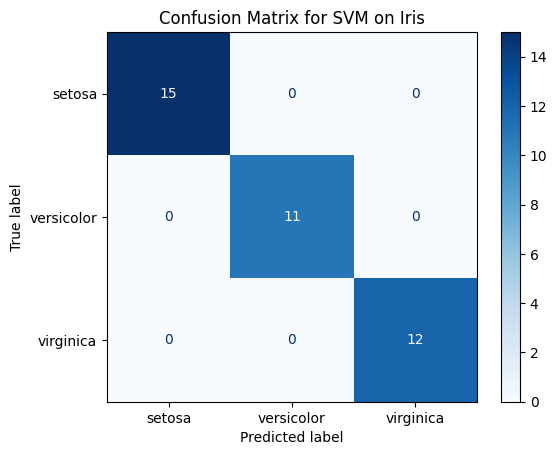

Best parameters: {'C': 100, 'gamma': 0.001}
Tuned SVM Accuracy: 0.9736842105263158


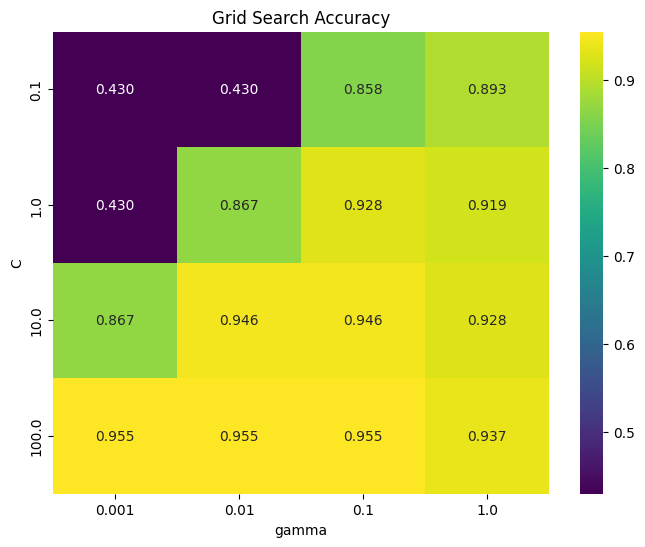

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Loading the Data
data = load_iris()
X, y = data.data, data.target

# 2. Data Pre‑processing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Model Training with Default Hyperparameters
model = SVC(kernel='rbf')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
base_acc = accuracy_score(y_test, y_pred)
print("SVM Accuracy (default):", base_acc)

# 4. Model Evaluation: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM on Iris")
plt.show()

# 5. Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train_scaled, y_train)
print("Best parameters:", grid.best_params_)
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
tuned_acc = accuracy_score(y_test, y_pred_best)
print("Tuned SVM Accuracy:", tuned_acc)

# 6. Visualizing Hyperparameter Tuning Results (Heatmap)
results = grid.cv_results_
# Reshape the mean test scores to form a grid
scores_mean = results['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))
df_scores = pd.DataFrame(scores_mean, index=param_grid['C'], columns=param_grid['gamma'])
plt.figure(figsize=(8,6))
sns.heatmap(df_scores, annot=True, fmt=".3f", cmap="viridis")
plt.xlabel("gamma")
plt.ylabel("C")
plt.title("Grid Search Accuracy")
plt.show()
